# Diwali Sales Analysis

In [1]:
# importing all libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import geopandas as gpd

## Loading Data

In [2]:
# importing data from the csv file
df = pd.read_csv('Diwali Sales Data.csv',encoding='unicode_escape')

In [3]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [7]:
df.shape

(11251, 15)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [4]:
# Deleting Status and unnamed1 columns from the dataframe
df.drop(['Status','unnamed1'],axis=1,inplace=True)

In [5]:
df.head(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99


In [6]:
#check the number of null values in each columns 
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [7]:
#Removing the null values
df.dropna(inplace=True)

In [19]:
# Initially there was 11251 rows but now
df.shape
#dropped 12 rows will null values

(11239, 13)

In [8]:
#Change the datatype of Amount from float to int
df['Amount'] = df['Amount'].astype('int')
df['Amount'].dtypes

dtype('int32')

## Exploratory Data Analysis

*Order of Highest Amount*

In [9]:
df[df['Amount'] == df['Amount'].max()].loc[:,['User_ID','Cust_name','State','Occupation','Amount']]

,User_ID,Cust_name,State,Occupation,Amount
0,1002903,Sanskriti,Maharashtra,Healthcare,23952


*Top 10 Customers with highest order amount*

In [59]:
df.groupby(['User_ID','Cust_name'] , as_index = False)['Amount'].sum().sort_values(by='Amount' , ascending = False).head(10)

,User_ID,Cust_name,Amount
1046,1001680,Vasudev,281034
1198,1001941,Gopal,239147
2136,1003476,Lalita,220435
1630,1002665,Champaklata,201104
2357,1003808,Vishakha,197660
2743,1004425,Indulekha,194343
2228,1003618,Keshav,189921
274,1000424,Sudevi,187679
2899,1004682,Vishakha,185122
808,1001298,Siddharth,184045


### Gender

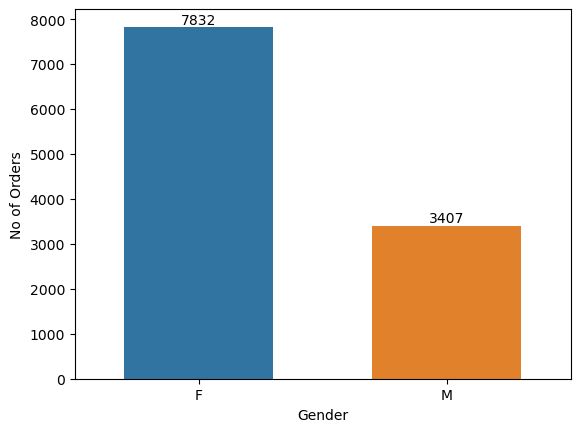

In [29]:
ax = sns.countplot( x = 'Gender' , data = df , width = 0.6)
plt.ylabel("No of Orders")

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

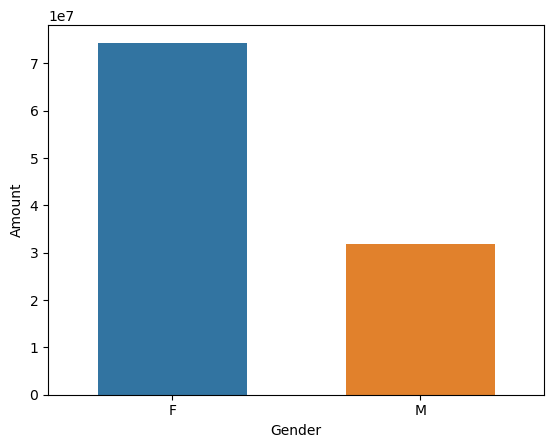

In [25]:
sales_by_gender = df.groupby('Gender',as_index=False)['Amount'].sum().sort_values(by='Amount', ascending = False)
sns.barplot(x = 'Gender' , y = 'Amount' , data = sales_by_gender , width = 0.6)

*From the above two graphs we can see that buyers are more Females compared to Males and even the amount spent is more*

### Age

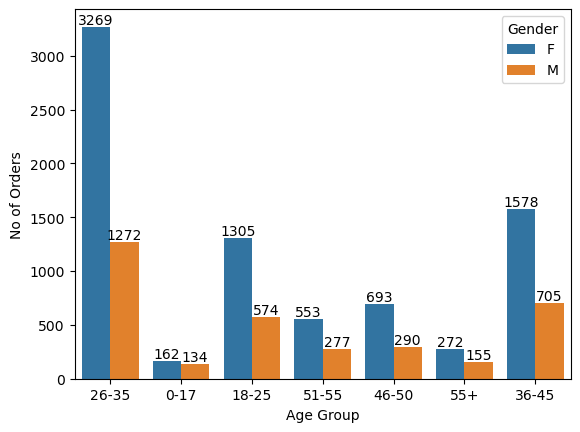

In [39]:
ax = sns.countplot( x = 'Age Group' , data = df , hue = 'Gender')
plt.ylabel("No of Orders")


for bars in ax.containers:
    ax.bar_label(bars)

*Above graph shows that Females in age group of 26-35 orders the most*

<Axes: xlabel='Age Group', ylabel='Amount'>

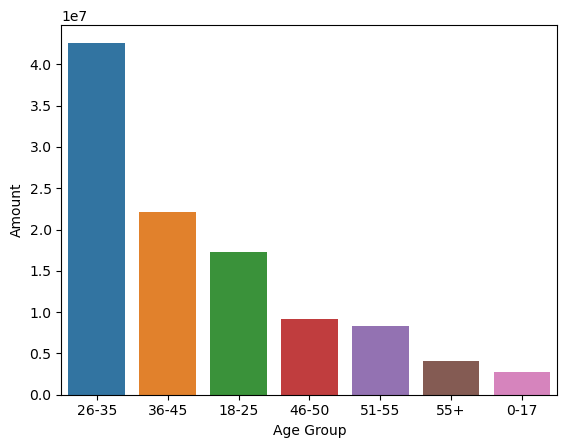

In [45]:
sales_by_age = df.groupby('Age Group' , as_index = False)['Amount'].sum().sort_values(by='Amount',ascending = False)

sns.barplot(x = 'Age Group' , y = 'Amount', data = sales_by_age)

*From the above graphs it is clear that most buyers are from the age group between 26 to 35*

### State

<Axes: xlabel='State', ylabel='Orders'>

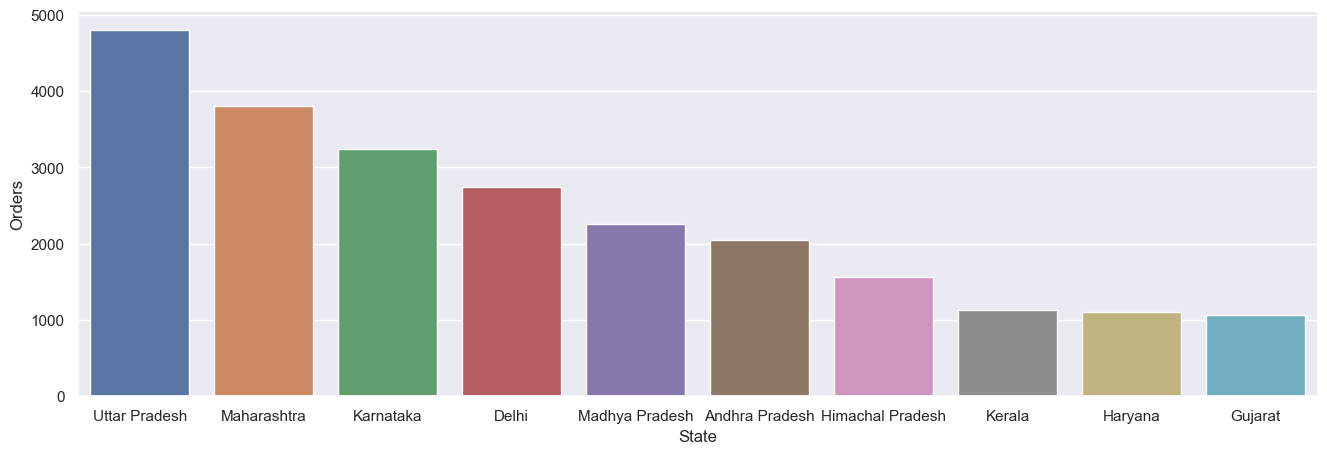

In [50]:
orders_by_state = df.groupby('State', as_index = False)['Orders'].sum().sort_values(by='Orders' , ascending = False).head(10) #top 10 states

sns.set(rc={'figure.figsize':(16,5)})

sns.barplot(x = 'State' , y = 'Orders' , data = orders_by_state)

Above graph shows top 10 states with most orders and top 3 are:
1. Uttar Pradesh
2. Maharashtra
3. Karnataka

<Axes: xlabel='State', ylabel='Amount'>

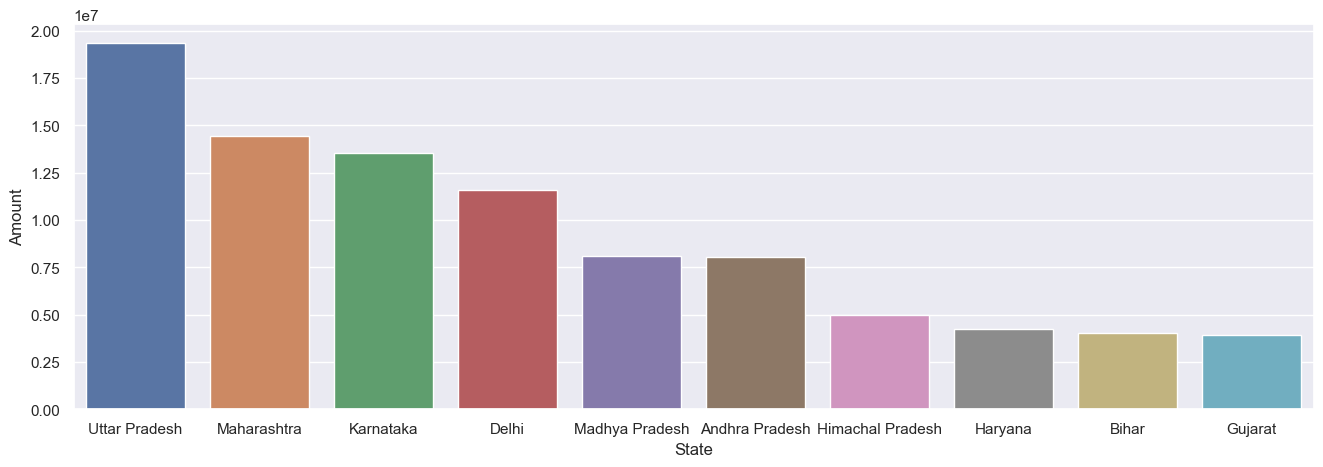

In [23]:
orders_by_state = df.groupby('State', as_index = False)['Amount'].sum().sort_values(by='Amount' , ascending = False).head(10) #top 10 states

sns.set(rc={'figure.figsize':(16,5)})

sns.barplot(x = 'State' , y = 'Amount' , data = orders_by_state)

*Comparing Orders and Amount Graph, Shows that Kerela has more orders than Haryana and Bihar but the purchase power was low compared to these*

### Order Density from different states across India

In [5]:
data = df.groupby('State')['Orders'].sum() #modifying data to show orders
data = pd.DataFrame(data)

In [6]:
shp_data = gpd.read_file('india-polygon.shp')[['st_nm','geometry']] #.shp file for plotting map

In [7]:
merged = shp_data.set_index('st_nm').join(data) #merging both dataframes
merged.fillna(0, inplace=True)

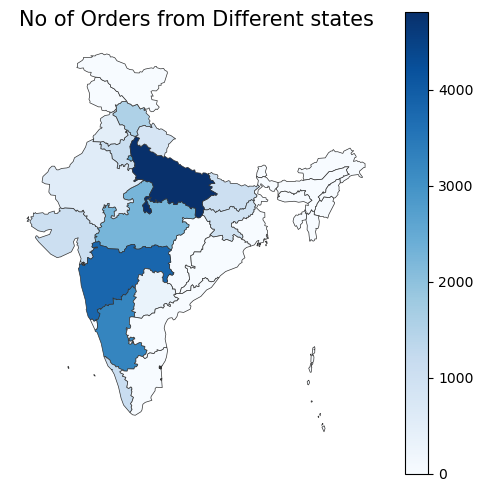

In [8]:
fig, ax = plt.subplots(1, figsize=(6, 6)) #plotting the map using matplotlib
ax.axis('off') 
ax.set_title('No of Orders from Different states',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merged.plot(column='Orders', cmap='Blues', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)

*Most Orders are from south-western and north-western states*

### Marital_Status 

<Axes: xlabel='Marital_Status', ylabel='Amount'>

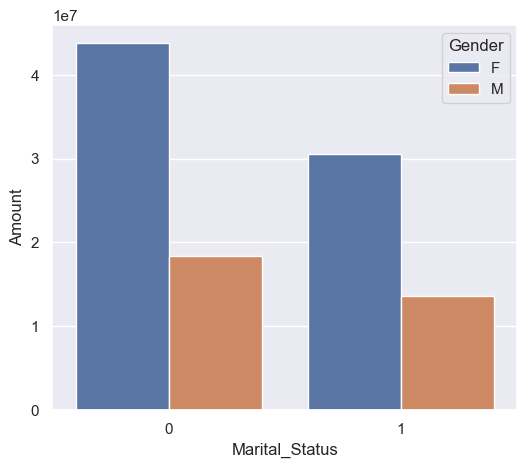

In [37]:
amount_by_marital_status = df.groupby(['Marital_Status','Gender'], as_index = False)['Amount'].sum().sort_values(by='Amount' , ascending = False)

sns.barplot(x = 'Marital_Status' , y = 'Amount' , data = orders_by_state , hue = 'Gender')

*From the above graph, we can say that unmarried women ordered the most and have the highest purchasing power*

### Occupation	

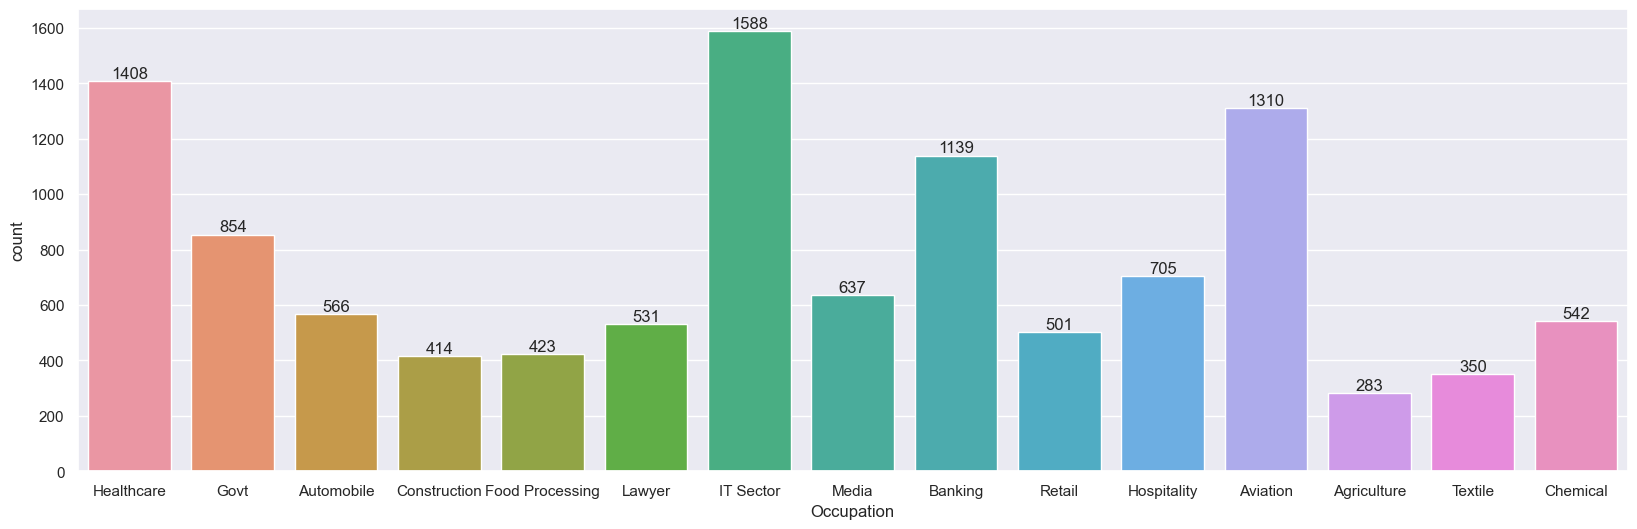

In [9]:
sns.set(rc={'figure.figsize':(20,6)})

ax = sns.countplot(x = 'Occupation' , data = df )

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

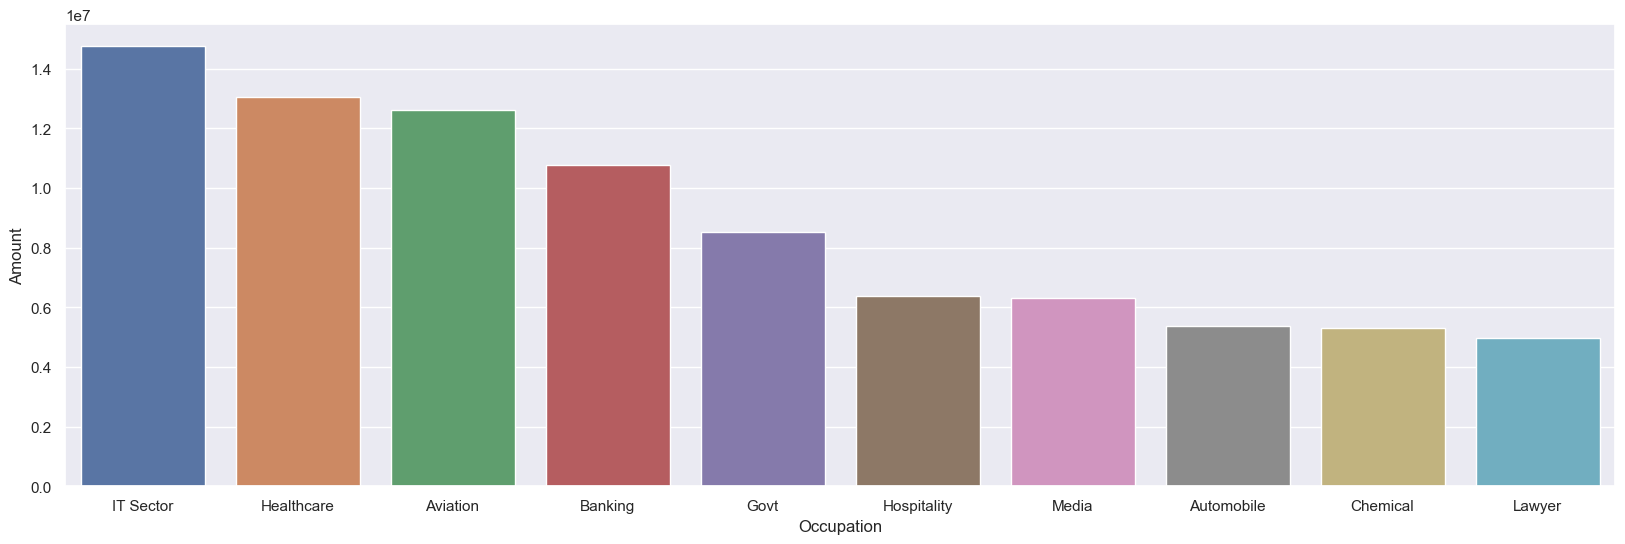

In [14]:
amount_by_occupations = df.groupby('Occupation' , as_index = False)['Amount'].sum().sort_values(by='Amount' , ascending = False).head(10)

sns.barplot(data = amount_by_occupations , x = 'Occupation' , y = 'Amount')

*From the ablove graphs, we can say that most of your buyers are from IT, Healthcare, Aviation and Banking Sector*

### Product_Category

In [17]:
# There are total 18 product categories
df['Product_Category'].nunique()

18

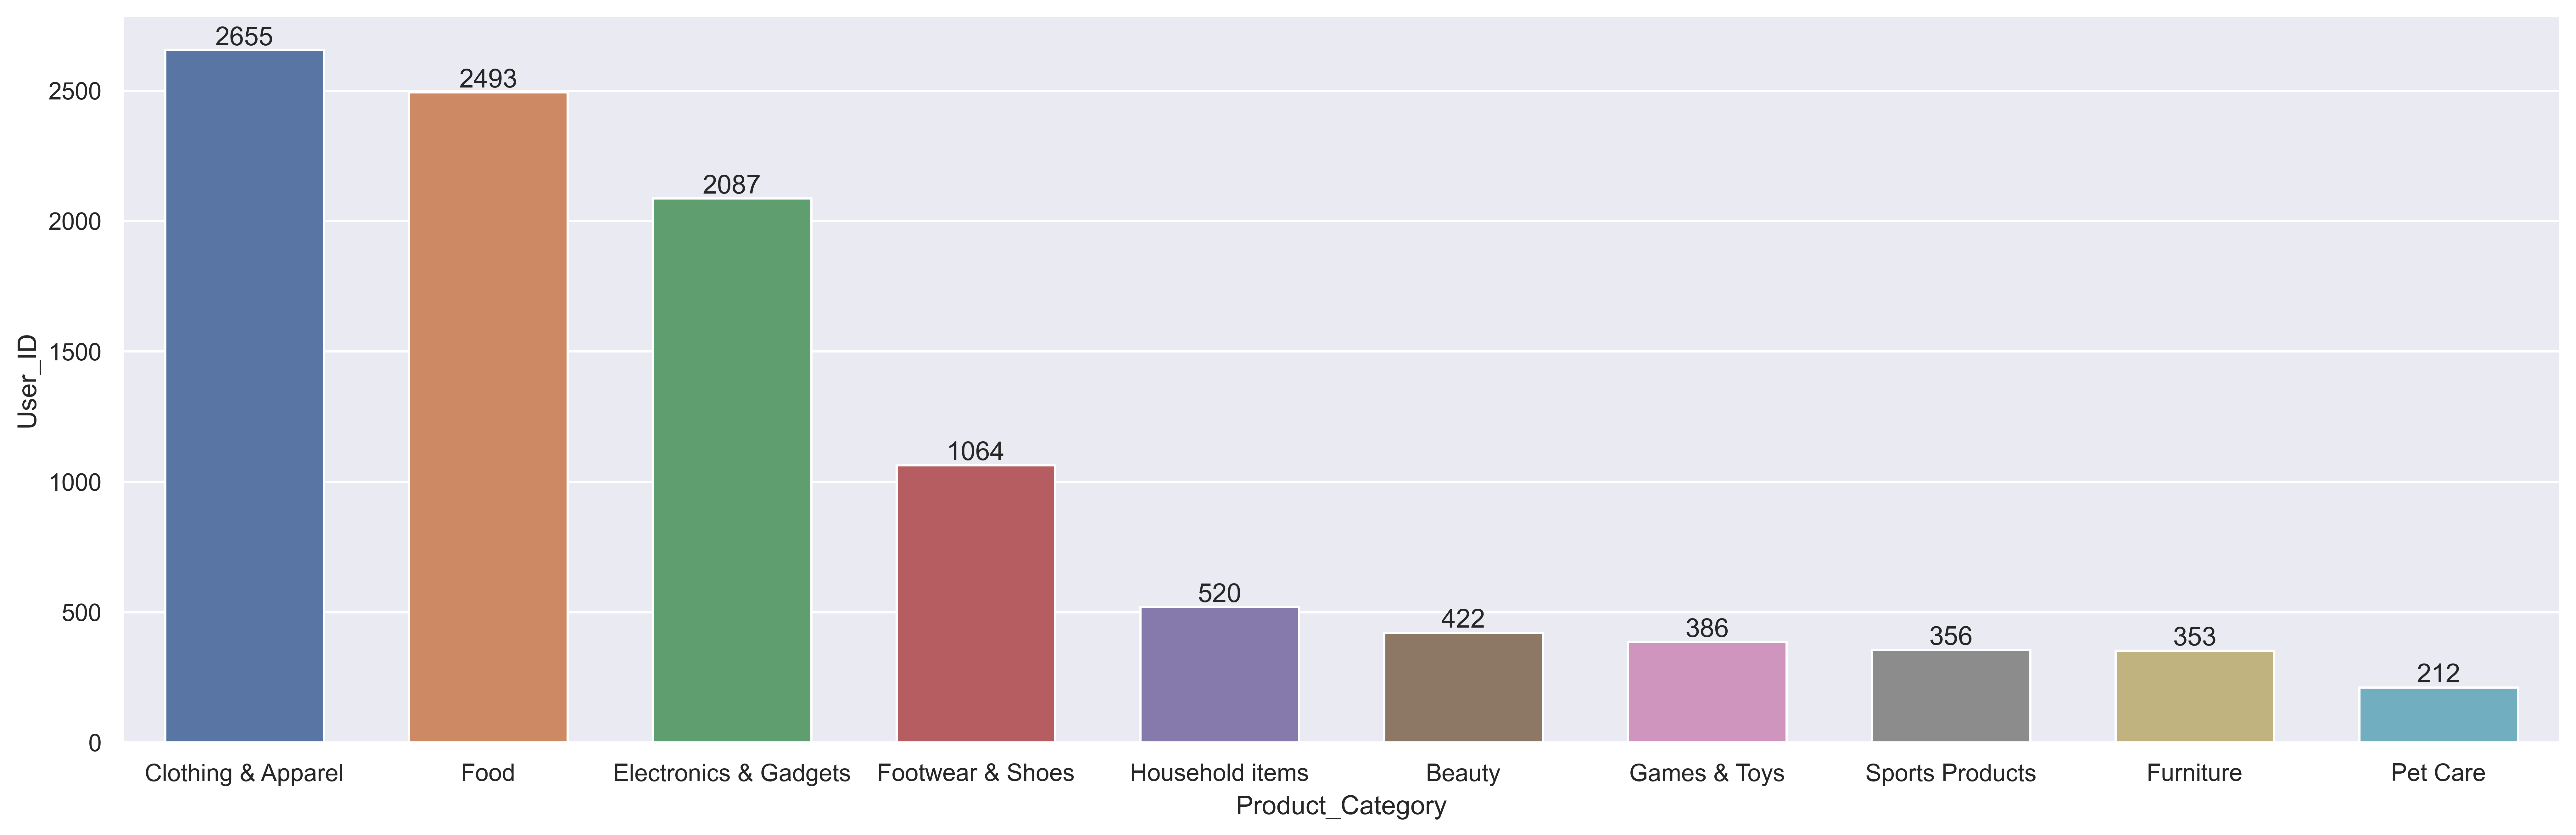

In [41]:
sns.set(rc={'figure.figsize':(20,6)})

#User_ID is just to take the count of the number of orders in each product category 
orders_by_category = df.groupby('Product_Category', as_index = False)['User_ID'].count().sort_values(by = 'User_ID' , ascending = False).head(10) 
ax = sns.barplot(x = 'Product_Category' , y = 'User_ID' , data = orders_by_category , width = 0.65)

for bars in ax.containers:
    ax.bar_label(bars)

In [45]:
df[df['Product_Category'] == 'Clothing & Apparel'].shape

(2655, 15)

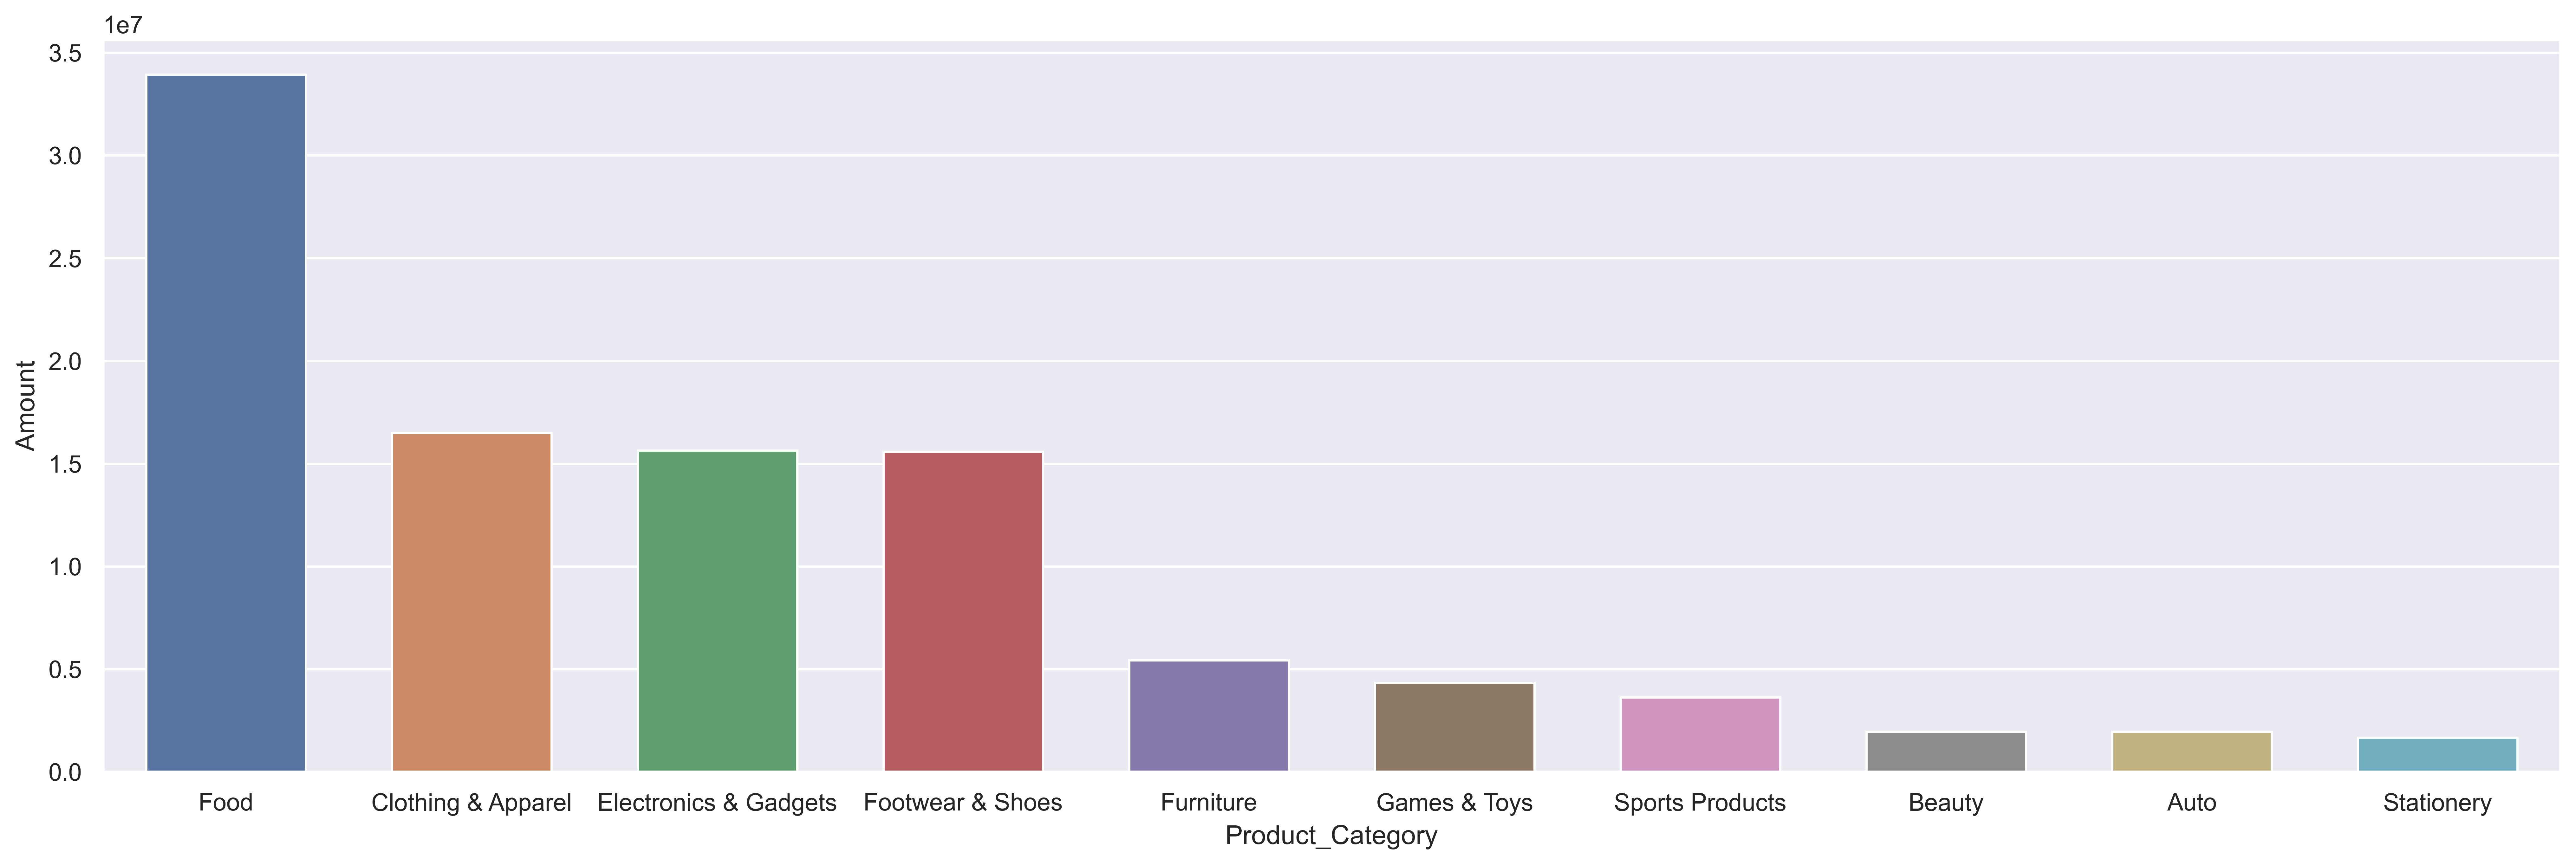

In [46]:
sns.set(rc={'figure.figsize':(20,6)})
 
orders_by_category = df.groupby('Product_Category', as_index = False)['Amount'].sum().sort_values(by = 'Amount' , ascending = False).head(10) 

ax = sns.barplot(x = 'Product_Category' , y = 'Amount' , data = orders_by_category , width = 0.65)

From above two graphs we can observe two things:
1. Buyers order products from Clothing & Apparel Category, Followed by Food and then Electronics.
2. But Food Category has highest amount of revenue approx double the amount of Clothing & Apparel

### Top 10 selling products

In [50]:
df.groupby('Product_ID' , as_index = False)['Amount'].sum().sort_values(by='Amount' , ascending = False).head(10)

,Product_ID,Amount
1680,P00265242,540136.0
645,P00110942,424833.0
1147,P00184942,401816.0
655,P00112142,341020.0
397,P00059442,338571.0
1505,P00237542,322363.0
389,P00058042,307040.0
643,P00110742,294548.0
644,P00110842,290661.0
493,P00080342,283309.0


*P00265242 is the most selling product*

In [54]:
# No of times P00265242 is being ordered
df[df['Product_ID'] == 'P00265242']['Orders'].sum()

127

## Conclusion:

In conclusion, my analysis of Diwali sales data revealed several key insights. 

1. The majority of buyers were women aged between 26 and 35 years old, with unmarried females making more purchases than married ones.
2. Additionally, Uttar Pradesh emerged as the top-selling state.
3. Buyers employed in IT, healthcare and aviation sectors accounted for a significant portion of sales.
4. The top-selling product was P00265242, which was ordered 127 times.
5. Finally, Vasudev, Gopal, and Lalita emerged as the top three buyers during the diwali sale.
   
These findings provide valuable insights for understanding consumer behavior and market trends during the Diwali season.